## Grean Tech Data

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [68]:
#load data
data = pd.read_csv(r'C:\Users\hp\Downloads\green_tech_data.csv')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   sustainability      100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [18]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [20]:
data.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [22]:
print(data.isnull())

    carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0              False          False               False            False   
1              False          False               False            False   
2              False          False               False            False   
3              False          False               False            False   
4              False          False               False            False   
..               ...            ...                 ...              ...   
95             False          False               False            False   
96             False          False               False            False   
97             False          False               False            False   
98             False          False               False            False   
99             False          False               False            False   

    sustainability  
0            False  
1            False  
2            False  
3  

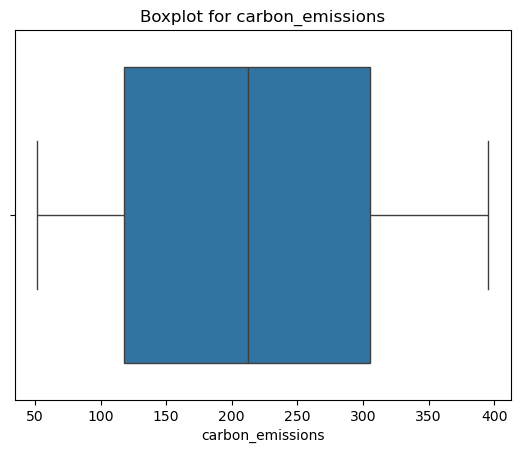

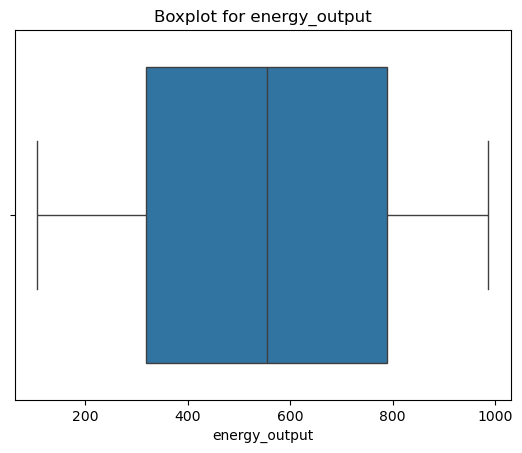

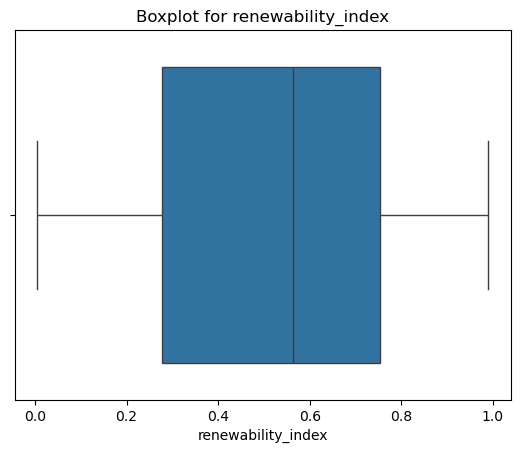

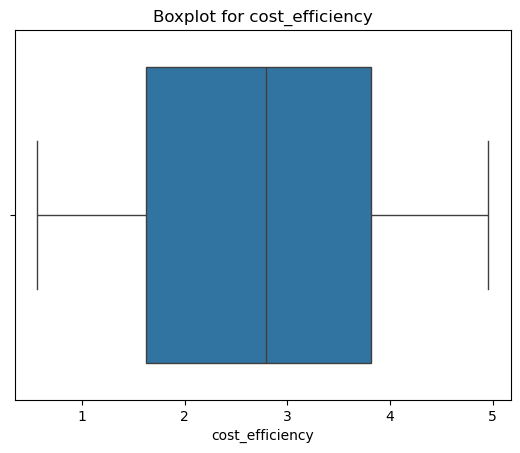

In [28]:
numeric_columns = ['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']
for col in numeric_columns:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [30]:
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    carbon_emissions  energy_output  renewability_index  \
carbon_emissions            1.000000      -0.034033           -0.037654   
energy_output              -0.034033       1.000000           -0.146354   
renewability_index         -0.037654      -0.146354            1.000000   
cost_efficiency            -0.211882      -0.011783           -0.214816   
sustainability             -0.441912      -0.102749            0.336193   

                    cost_efficiency  sustainability  
carbon_emissions          -0.211882       -0.441912  
energy_output             -0.011783       -0.102749  
renewability_index        -0.214816        0.336193  
cost_efficiency            1.000000       -0.361310  
sustainability            -0.361310        1.000000  


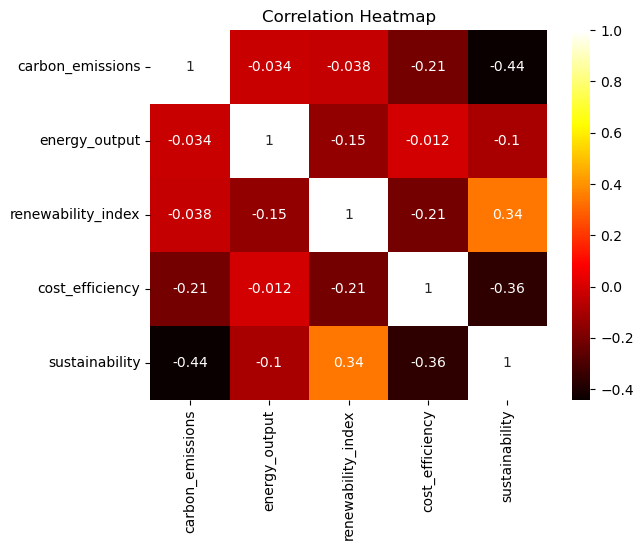

In [32]:
# Heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="hot")
plt.title("Correlation Heatmap")
plt.show()

In [34]:
# Example feature selection
X=data[ ['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y=data['sustainability']

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [44]:
X_train.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency
55,372.655982,317.849744,0.556801,3.390887
88,360.524460,576.685521,0.286541,3.877766
26,119.885824,836.213289,0.973011,2.994593
42,62.035982,547.523655,0.914864,1.279408
69,395.410428,631.803649,0.293592,0.812126


In [48]:
y_pred = model.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test,y_pred)
print("Accur",accuracy)

Accur 0.95


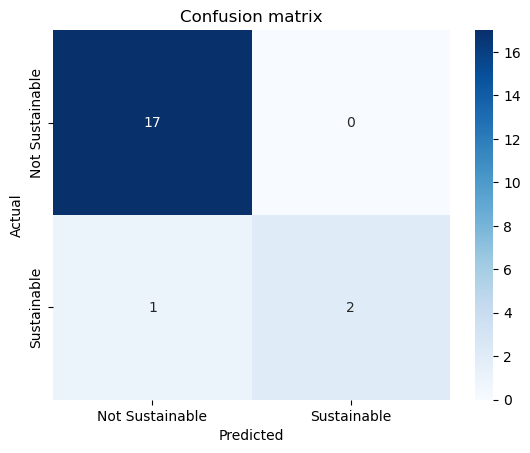

In [58]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Not Sustainable', 'Sustainable'],
           yticklabels=['Not Sustainable', 'Sustainable'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [60]:
#Classification Report
print(classification_report(y_test,y_pred,target_names=['Not Sustainable', 'Sustainable']))


                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20

                    Coefficient
carbon_emissions      -0.023347
energy_output          0.001097
renewability_index     1.092184
cost_efficiency       -1.259560


In [62]:
# Feauture importance
coefficients = pd.DataFrame(model.coef_.T,index=X.columns,columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.023347
energy_output          0.001097
renewability_index     1.092184
cost_efficiency       -1.259560


In [64]:
import joblib
joblib.dump(model,'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']

In [66]:
#load the model
model = joblib.load('lrmodel_sustainable.pkl')

In [80]:
new_data = np.array([[22.49,45.33,52.33,66.77]])


In [82]:
predictions = model.predict(new_data)
print(predictions)

[0]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
